# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:
%matplotlib notebook

## importing the libraries

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
from matplotlib.figure import Figure
import datetime
import numpy as np

##  to locate the location of place whose data is provided to analyse

<IPython.core.display.Javascript object>


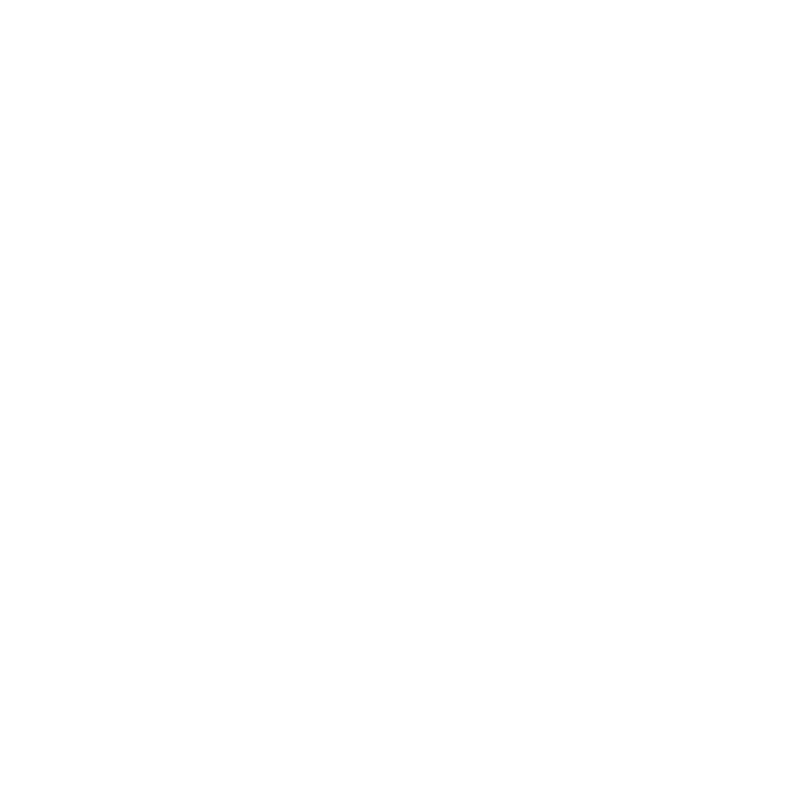

In [4]:
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

## Get the data

In [9]:
df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

## Exploratory data analysis

In [10]:
#changing date column from string to date
df['Date']=df['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
#changing the data_value to one -tenth to get its actual value
df['Data_Value']=df['Data_Value']/10

In [11]:
#dropping the columns for any leap year days
df=df[df['Date'].apply(lambda x : x.month*100+x.day) !=229]     

In [12]:
#creating the mon_day column for month_day to get data for all 365 days wrt month used to group by later
df['mon_day']=df.Date.apply(lambda x : x.month*100+x.day)
#divinf data frame into two separate data frame to get data from 2005-2014 in one frame and 2015 data in another
df14=df[df['Date'] <= datetime.datetime(2014,12,31).date()]
df15=df[df['Date'] > datetime.datetime(2014,12,31).date()]

In [13]:
#separating the max and min elements
Tmax14=df14[(df14['Element']=='TMAX')]
Tmin14=df14[(df14['Element']=='TMIN')]
#group by day on max and min data frame individually
temp=Tmax14.groupby(['mon_day']).agg({max})
temp1=Tmin14.groupby(['mon_day']).agg({min})
#merging the man & min frame into single frame
df_fin14=temp.merge(temp1,right_index=True,left_index=True)['Data_Value']

# repeating same steps as above for year-2015 data frame
Tmax15=df15[(df15['Element']=='TMAX')]
Tmin15=df15[(df15['Element']=='TMIN')]

temp=Tmax15.set_index(['mon_day']).groupby(level=0)['Data_Value'].agg({'max15':max})
temp1=Tmin15.set_index(['mon_day']).groupby(level=0)['Data_Value'].agg({'min15':min})

df_fin15=temp.merge(temp1,right_index=True,left_index=True)



In [17]:
#merging into a single data frame with columns max, min temp for maximun and minimum value from 2005-2014 and max15, min15 
#columns for year 2015 data
df_fin=df_fin15.merge(df_fin14,right_index=True,left_index=True)
df_fin.head()

,max15,min15,max,min
mon_day,,,,
101,1.1,-13.3,15.6,-16.0
102,3.9,-12.2,13.9,-26.7
103,3.9,-6.7,13.3,-26.7
104,4.4,-8.8,10.6,-26.1
105,2.8,-15.5,12.8,-15.0


In [34]:
#recreating the date column with month and day value as required and using any value as year(eg 2000) value as it wont be used
#but is required to create a valid date column
df_fin['Date']=(df_fin.index/100).astype(int).astype(str)+'-'+(df_fin.index%100).astype(str)+'-2000'
type(df_fin['Date'][101])

str

In [35]:
#changing date column from string to date
df_fin['Date']=df_fin['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m-%d-%Y").date())
type(df_fin['Date'][101])

datetime.date

In [36]:
#final data frame
df_fin.head()

,max15,min15,max,min,Date
mon_day,,,,,
101,1.1,-13.3,15.6,-16.0,2000-01-01
102,3.9,-12.2,13.9,-26.7,2000-01-02
103,3.9,-6.7,13.3,-26.7,2000-01-03
104,4.4,-8.8,10.6,-26.1,2000-01-04
105,2.8,-15.5,12.8,-15.0,2000-01-05


## Plotting

<IPython.core.display.Javascript object>


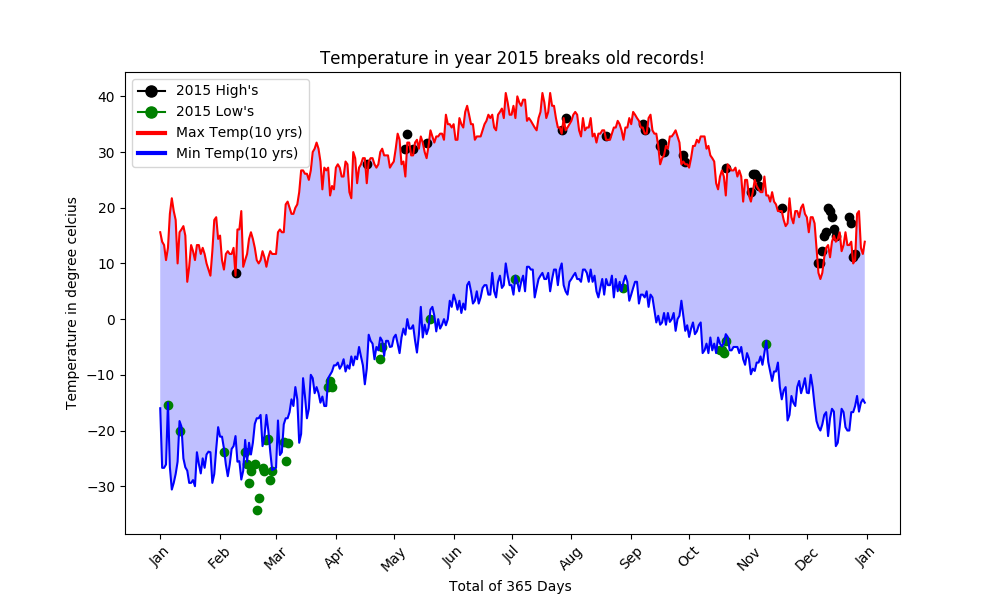

In [120]:
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)

#plotting high(max) as red and low(min) as blue
plt.plot(df_fin['Date'],df_fin14['max'],color='r')
plt.plot(df_fin['Date'],df_fin14['min'],color='b')

locator = mdates.MonthLocator() 
ax1.xaxis.set_major_locator(locator)
#only the month columns are required
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#rotating label by 45 degrees
for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        

ax1.fill_between(df_fin['Date'].values,df_fin['max'].values,df_fin['min'].values,facecolor = 'blue', alpha =0.25)

data15max=df_fin[df_fin['max15']>df_fin['max']]#only those data where 2015 crossed record high
ax1.scatter(data15max['Date'].values,data15max['max15'].values,color='k',marker='o')

data15min=df_fin[df_fin['min15']<df_fin['min']]#only those data where 2015 crossed record low
ax1.scatter(data15min['Date'].values,data15min['min15'].values,color='g',marker='o')

plt.title('Temperature in year 2015 breaks old records!')
plt.xlabel('Total of 365 Days ')
plt.ylabel('Temperature in degree celcius')

legend_elements=[Line2D([0], [0], marker='o', color='k', label="2015 High's",
                          markerfacecolor='k', markersize=8),
                 Line2D([0], [0], marker='o', color='g', label="2015 Low's",
                          markerfacecolor='g', markersize=8),
                 Line2D([0], [0], color='r',label='Max Temp(10 yrs)', lw=3),
                 Line2D([0], [0],color='b',label='Min Temp(10 yrs)' ,lw=3)
                ]


plt.legend(handles=legend_elements)
#save the figure
plt.savefig('Weather_pattern2015.png')
plt.show()